Глава 4. Основы NumPy: массивы и векторные вычисления

# 4.1. NumPy ndarray: объект многомерного массива

In [1]:
import numpy as np
# а можно чтобы не писать постоянно np: import numpy as *

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# генерация случайного массива
# ndarray - это многомерный контейнер для однородных данных (т.е. для элементов одного типа)
data = np.random.randn(2, 3)

data

array([[ 0.22139902, -1.24724276, -0.11127518],
       [ 1.2233772 ,  0.07513705, -1.9531759 ]])

In [3]:
data * 10

array([[  2.21399022, -12.47242763,  -1.1127518 ],
       [ 12.23377198,   0.75137045, -19.53175902]])

In [4]:
data + data

array([[ 0.44279804, -2.49448553, -0.22255036],
       [ 2.4467544 ,  0.15027409, -3.9063518 ]])

In [5]:
# размер массива
data.shape

(2, 3)

In [6]:
# тип данных в массиве
data.dtype

dtype('float64')

## Создание ndarray

In [7]:
# создание одномерного массива
arr1 = np.array([6, 7.5, 8, 0, 1])

arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [8]:
# создание многомерного массива
# создание одномерного массива
# arr2 = np.array([1, 2, 3, 4], [5, 6, 7, 8])-ошибка
arr2 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
# количество измерений массива
arr2.ndim

2

In [10]:
# еще один пример
arr3 = np.array([[[[[1,2],[3,4]]]]])

print(arr3.shape)
print(arr3.ndim)

(1, 1, 1, 2, 2)
5


In [11]:
# np.array самостоятельно определяет тип данных массива
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [12]:
# создание заполненных массивов
print('1)', np.zeros(10))

print('2)', np.zeros((3, 6)))
# вызывать функцию empty небезопасно, т.к. она может выдать мусор
# сама функция empty выделяет под новый массив память, но не инициализирует её
print('3)', np.empty((2, 3, 2)))

print('4)', np.ones((3, 6)))

# заполнение массива произвольным числом 
print('5)', np.full((3, 2, 6), 5))

1) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2) [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
3) [[[1.23336173e-311 2.81617418e-322]
  [0.00000000e+000 0.00000000e+000]
  [6.23053953e-307 1.33664410e+160]]

 [[4.26592179e-090 1.38240129e-047]
  [2.82998852e-033 1.91974938e-052]
  [6.48224659e+170 4.93432906e+257]]]
4) [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
5) [[[5 5 5 5 5 5]
  [5 5 5 5 5 5]]

 [[5 5 5 5 5 5]
  [5 5 5 5 5 5]]

 [[5 5 5 5 5 5]
  [5 5 5 5 5 5]]]


In [13]:
# функция arange - вариант встроенной в Python функции range, только возвращаемым значением является массив
print(np.arange(15))

# как сделать не NumPy-ский массив:
print([i for i in range(5)])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0, 1, 2, 3, 4]


## Тип данных для ndarray

In [14]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

print(arr1.dtype)
print(arr2.dtype)

float64
int32


## Арифметические операции с массивами NumPy

In [15]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

print('1)',arr)
print('2)',arr * arr)
print('3)',arr - arr)
print('4)',1 / arr)
print('5)',arr ** 0.5)

# сравнение массивов одинакового размера дает булев массив
print('6)',arr2 > arr)

1) [[1. 2. 3.]
 [4. 5. 6.]]
2) [[ 1.  4.  9.]
 [16. 25. 36.]]
3) [[0. 0. 0.]
 [0. 0. 0.]]
4) [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
5) [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]
6) [[False  True False]
 [ True False  True]]


## Индексирование и вырезание

In [16]:
arr = np.arange(10)
print('1)', arr[5:8])

arr[5:8] = 12
print('2)', arr)

# Важнейшее отличие массивов от списков в том, что срез массива является представлением исходного массива,
# т.е. любые изменения, внесенные в представление, попадают и в исходный массив
arr_slice = arr[5:8]
arr_slice[1] = 12345
print('3)', arr)

# [:] используется для записи во все элементы массива
arr_slice[:] = 64
print('4)', arr)

# чтобы получить копию среза массива, можно использовать arr[5:8].copy()
a = arr[5:8].copy()
print('5)',a)

# обращение к отдельным элементам
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('6.1)', arr2d[0][2])
print('6.2)', arr2d[0, 2])

# таблица обращений к каждому элементу массива
column=['0','1','2']
index=['0','1','2']
df1 = pd.DataFrame(np.array([['0, 0','0, 1','0, 2'],['1, 0','1, 1','1, 2'],['2, 0','2, 1','2, 2']]), columns=column, index=index)
df1

1) [5 6 7]
2) [ 0  1  2  3  4 12 12 12  8  9]
3) [    0     1     2     3     4    12 12345    12     8     9]
4) [ 0  1  2  3  4 64 64 64  8  9]
5) [64 64 64]
6.1) 3
6.2) 3


,0,1,2
0,"0, 0","0, 1","0, 2"
1,"1, 0","1, 1","1, 2"
2,"2, 0","2, 1","2, 2"


### Индексирование срезами

In [17]:
print('1)', arr)
print('2)', arr[1:6])
print('3)', arr2d)
print('4)', arr2d[:2])

# можно указать несколько срезов - как несколько индексов:
print('5)', arr2d[:2, 1:])

1) [ 0  1  2  3  4 64 64 64  8  9]
2) [ 1  2  3  4 64]
3) [[1 2 3]
 [4 5 6]
 [7 8 9]]
4) [[1 2 3]
 [4 5 6]]
5) [[2 3]
 [5 6]]


In [18]:
# несколько примеров срезов двумерного массива
# arr2d[строки, столбцы]
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('0)\n', arr2d)

arr2d[:2, 1:] = 0
print('1)\n', arr2d)

arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2:, :] = 0
print('2)\n', arr2d)

arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[:, :2] = 0
print('3)\n', arr2d)

arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[1, :2] = 0
print('4)\n', arr2d)

0)
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
1)
 [[1 0 0]
 [4 0 0]
 [7 8 9]]
2)
 [[1 2 3]
 [4 5 6]
 [0 0 0]]
3)
 [[0 0 3]
 [0 0 6]
 [0 0 9]]
4)
 [[1 2 3]
 [0 0 6]
 [7 8 9]]


## Булево индексирование

- Допустим мы хотим вывести все строки из массива data, которым соответствет 'Bob' из массива names


In [19]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.41084742  0.15308593  0.91471375  1.02272162]
 [ 1.01759401 -1.02505663 -2.00381797 -1.77452477]
 [ 2.24699216  0.96579738  0.03538349 -0.88914404]
 [ 0.79862965  0.31000839 -1.02369312 -1.40274433]
 [ 0.95524409  0.93553612  0.07501055 -0.73128682]
 [ 1.7180675  -1.66846573 -0.08439142  0.17845563]
 [-1.26364233 -0.52354446  0.98002203 -1.14486941]]


In [20]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [21]:
data[names == 'Bob']

array([[-0.41084742,  0.15308593,  0.91471375,  1.02272162],
       [ 0.79862965,  0.31000839, -1.02369312, -1.40274433]])

In [22]:
# Также можно вывести с указанием, какие столбцы выводить
print(data[names == 'Bob', 2:])
print(data[names == 'Bob', 3])

[[ 0.91471375  1.02272162]
 [-1.02369312 -1.40274433]]
[ 1.02272162 -1.40274433]


In [23]:
# для инвертирования можно использовать ~
print(names != 'Bob')
print(data[~(names == 'Bob')])

[False  True  True False  True  True  True]
[[ 1.01759401 -1.02505663 -2.00381797 -1.77452477]
 [ 2.24699216  0.96579738  0.03538349 -0.88914404]
 [ 0.95524409  0.93553612  0.07501055 -0.73128682]
 [ 1.7180675  -1.66846573 -0.08439142  0.17845563]
 [-1.26364233 -0.52354446  0.98002203 -1.14486941]]


In [24]:
# использование нескольких условий
mask = (names == 'Bob') | (names == 'Will')
print(mask)
print(data[mask])

[ True False  True  True  True False False]
[[-0.41084742  0.15308593  0.91471375  1.02272162]
 [ 2.24699216  0.96579738  0.03538349 -0.88914404]
 [ 0.79862965  0.31000839 -1.02369312 -1.40274433]
 [ 0.95524409  0.93553612  0.07501055 -0.73128682]]


## Прихотливое индексирование

- Термином прихотливое индексирование в NumPy обозначается индексирование с помощью целочисленных массивов

In [25]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [26]:
# чтобы выбрать подмножество строк в определенном порядке,
# можно просто передать список или массив целых чисел, 
# описывающих желаемый порядок
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [27]:
# если указать отрицательный номер, то индекс будет отсчитываться с конца
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [28]:
# создаем массив reshape((количество строк, количество столбцов))
arr = np.arange(32).reshape((8, 4))
print(arr)

# при передаче нескольких массивов индексов в данном случае отбираются элементы
# (1, 0), (5, 3), (7, 1), (2, 2)
print('\n', arr[[1, 5, 7, 2], [0, 3, 1, 2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]

 [ 4 23 29 10]


In [29]:
# многие пользователи ожидают другой результат в вводе выше, такой:
# берем 1 5 7 2 строки и выводи столбцы в порядке 0 3 1 2:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Транспонирование массивов и перестановка осей

- Транспонирование - частный случай изменения формы
- имеется специальный атрибут $T$

In [30]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print('\n', arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


вычисление матриц $X^TX$ :

In [31]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [32]:
# метод transpose принимает картеж номеров осей, описывающий их перестановку
arr = np.arange(32).reshape((2, 4, 4))
print(arr)
arr.transpose((1, 0, 2))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]]


array([[[ 0,  1,  2,  3],
        [16, 17, 18, 19]],

       [[ 4,  5,  6,  7],
        [20, 21, 22, 23]],

       [[ 8,  9, 10, 11],
        [24, 25, 26, 27]],

       [[12, 13, 14, 15],
        [28, 29, 30, 31]]])

In [33]:
# метод swapaxes, который принимает пару номеров осей и меняет их местами,
# в результате чего данные реорганизуются:
arr = np.arange(16).reshape(2,2,4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [34]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2. Универсальные функции: быстрые поэлементные операции над массивами

- Универсальной функцией или $u-функцией$, называется функция, которая выполняет поэлементные операции над данными, хранящимися в объектах ndarray

In [35]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [37]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

- Такие $u-функции$ называются $унарными$
- Другие функции, например, $add$, $maximum$ принимают на вход два массива и поэтому называются $бинарными$ и возвращают один результирующий массив

In [38]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x)
print(y)
np.maximum(x, y)
# здесь np.maximum(x, y) вычисляет поэлементные максимумы в массивах x и y

[-0.84346155 -0.89671821 -0.61173566 -0.45968582 -0.35753046 -0.90202207
  0.21838366  0.25081051]
[ 1.54299767 -0.24908593  0.63758811 -0.54776089 -0.94354442  0.62884287
 -0.09839125 -0.61054894]


array([ 1.54299767, -0.24908593,  0.63758811, -0.45968582, -0.35753046,
        0.62884287,  0.21838366,  0.25081051])

In [39]:
# нечасто можно встретить u-функцию, возвращающую несколько массивов.
# например, modf возвращает дробные и целые части хранящихся в массиве чисел
arr = np.random.randn(7) * 5
print(arr)
remainder, whole_part = np.modf(arr)
print('\n',remainder)
print(whole_part)

[-0.53155954  1.77783193 -3.37127802 -8.45784943 -0.48537806 -4.76774747
  0.72606976]

 [-0.53155954  0.77783193 -0.37127802 -0.45784943 -0.48537806 -0.76774747
  0.72606976]
[-0.  1. -3. -8. -0. -4.  0.]


# 4.3. Программирование с применением массивов

- Векторизация - способ замены явных циклов выражениями-массивами
- Векторные операции с массивами выполняются на несколько порядков быстрее, чем эквивалентные операции на чистом Python

In [40]:
# np.meshgrid() принимает два одномерных массива и порождает две двумерные матрицы,
# соответствующие всем парам (x, y), т.е. одна матрица x, другая y
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
print(xs)
print('\n',ys)

# теперь можно легко вычислить sqrt(xs**2 + ys**2) 
z = np.sqrt(xs**2 + ys**2)
print('\n',z)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]

 [[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]

 [[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


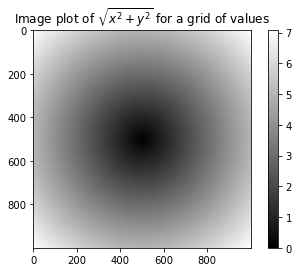

In [41]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.draw()

## Запись логических условий в виде операций с массивами

In [42]:
# пусть есть булев массив и два массива значений
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

# Допустим, мы хотим брать значение из массива xarr,
# если соответственное значение в массиве cond = True
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

- $np.where$(условие, что мы делаем если условие верно, что мы делаем если условие НЕ верно)
- Действием может быть как вставление значения массива(arr), так и мат  операция (10*a)

In [43]:
# Предыдущее решение долгое, а также к многомерным массивам не применимо
#  с помощью np.where можно сделать лаконичнее
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [44]:
#  При анализе данных where обычно применяется, чтобы создать новый массив
# на основе существующего
# заменим в массиве случайных чисел все положительные числа на 2, а отрицательные на -2
arr = np.random.randn(4, 4)
print(arr)
print('\n', arr > 0)
print('\n', np.where(arr > 0, 2, -2))

[[-1.56354562  0.60162422  1.77277316 -2.92005549]
 [ 0.28333728 -1.13799786 -1.02077439 -0.45773259]
 [-0.74224214 -0.39834388 -0.531235    1.09102041]
 [-0.86333714  0.33988419 -0.15195658  0.07020289]]

 [[False  True  True False]
 [ True False False False]
 [False False False  True]
 [False  True False  True]]

 [[-2  2  2 -2]
 [ 2 -2 -2 -2]
 [-2 -2 -2  2]
 [-2  2 -2  2]]


In [45]:
# С помощью np.where можно комбинировать скаляры и массивы:
np.where(arr > 0, 2, arr) # если значение больше 0, то заменяем на 2, если меньше, то берем значение из массива arr

array([[-1.56354562,  2.        ,  2.        , -2.92005549],
       [ 2.        , -1.13799786, -1.02077439, -0.45773259],
       [-0.74224214, -0.39834388, -0.531235  ,  2.        ],
       [-0.86333714,  2.        , -0.15195658,  2.        ]])

## Математические и статистические операции

In [46]:
arr = np.random.randn(5, 4)
arr

array([[-1.16237727,  0.81431287,  0.81408857,  1.28965979],
       [ 0.4474653 ,  2.13073622,  1.90853261, -1.11730851],
       [ 1.16182813, -0.92929347,  0.85807831,  0.69881589],
       [ 0.95038499, -1.1406665 ,  0.41468624,  0.7414622 ],
       [-1.18033805, -0.8839886 ,  0.55108703, -1.85782072]])

In [47]:
# среднее число в массиве
arr.mean()

# или так, ответ одинаковый
np.mean(arr)

0.22546725149835461

In [48]:
# сумма всех элементов массива
arr.sum()

4.5093450299670925

- функции типа mean, sum принимают не обязательный аргумент axis, при наличии которого вычисляется статистика по заданной оси

In [49]:
# Вычисление среднего по столбцам
print(arr.mean(axis=1))

# Вычисление суммы по строкам
print('\n', arr.sum(axis=0))

[ 0.43892099  0.8423564   0.44735722  0.24146673 -0.84276508]

 [ 0.2169631  -0.00889948  4.54647276 -0.24519135]


- другие методы, например, cumsum и cumprod, ничего не агрегируют, а порождают массив промежуточных результатов

In [50]:
# cumsum() производит сложение всех элементов поочередно
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [51]:
# также можно применять к строкам и столбцам
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
print('\n', arr.cumsum(axis=0))

# cumprod() производит умножение всех элементов поочередно
print('\n', arr.cumprod(axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]

 [[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]

 [[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


##### Таблица 4.5. Статистические методы массива
- sum - сумма всего массива или вдоль одной оси sum(axis = 1)
- mean - среднее арифметическое
- std, var - стандартное отклонение и дисперсия. Может быть задано число степеней свободы (по умолчанию n)
- min, max - минимум и максимум
- argmin, argmax - индексы минимального и максимального элементов
- cumsum - нарастающая сумма с начальным значением 0
- cumprod - нарастающее произведение с начальным значением 1

## Методы булевых массивов

In [52]:
# булевы значения приводятся к 1 (True) и 0 (False), 
# поэтому функция sum часто используется для подсчета True
arr = np.random.randn(100)
(arr > 0).sum()

48

- существует еще два метода any и all
- any проверяет, есть ли в массиве хотя бы одно значение True
- all проверяет, все ли значения массива равны True

In [53]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


In [54]:
bools = np.array([False, False, False, False])
print(bools.any())
print(bools.all())

False
False


In [55]:
bools = np.array([True, True, True, True])
print(bools.any())
print(bools.all())

True
True


- эти методы работают и для небулевых массивов, тогда все отличные элементы от 0 считаются равными True

## Сортировка

In [56]:
arr = np.random.randn(6)
print(arr)

arr.sort()
print('\n',arr)

[-1.16646382  0.42073658  1.66813831 -0.02256274 -1.17837716  0.39820034]

 [-1.17837716 -1.16646382 -0.02256274  0.39820034  0.42073658  1.66813831]


In [57]:
# любой одномерный участок массива можно отсортировать на месте,
# передав методу sort номер оси:
# (в данном случае сортируем столбцы)
arr = np.random.randn(5, 3)
print(arr)

arr.sort(1)
print('\n',arr)

[[ 1.07301741  1.30412726 -0.85154723]
 [ 0.04906316  1.23618935 -0.36618482]
 [-0.17533952 -1.0987625   1.20940766]
 [-1.2836249  -0.89710213 -0.55487154]
 [ 0.57712733  0.90477865 -2.16126177]]

 [[-0.85154723  1.07301741  1.30412726]
 [-0.36618482  0.04906316  1.23618935]
 [-1.0987625  -0.17533952  1.20940766]
 [-1.2836249  -0.89710213 -0.55487154]
 [-2.16126177  0.57712733  0.90477865]]


- метод np.sort возвращает отсортированную копию массива, а не сортирует массив на месте


In [58]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% квантиль

-1.6392665290053359

## Устранение дубликатов и другие теоретико-множественные операции

In [59]:
# функция np.unique возвращает отсортированное множество уникальных элементов в массиве
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# На чистом Python это выглядело бы так:
# sorted(set(names))

ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print(np.unique(ints))

['Bob' 'Joe' 'Will']
[1 2 3 4]


In [60]:
# функция mp.in1d проверяет, присутствуют ли значения из одного массива в другом,
# и возвращает булев массив
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

- функция intersect1d(x,y) вычисляет отсортированное множество элементов, общих для x и y

# 4.4. Файловый ввод-вывод массивов

- $np.save$ и $np.load$ - основные функции для эффективного сохранения и загрузки данных с диска
- по умолчанию массивы сохраняются в несжатом двоичном формате в файле с расширением $.npy$

In [61]:
arr

array([[-0.85154723,  1.07301741,  1.30412726],
       [-0.36618482,  0.04906316,  1.23618935],
       [-1.0987625 , -0.17533952,  1.20940766],
       [-1.2836249 , -0.89710213, -0.55487154],
       [-2.16126177,  0.57712733,  0.90477865]])

In [62]:
arr = np.arange(10)
np.save('some_array', arr) # .npy можно не писать, т.к. это подразумевается по умолчанию

In [63]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
# можно сохранить несколько массивов в zip-архиве
np.savez('array_archive.npz', a=arr, b=arr)

In [65]:
# при считывании npz файла мы получаем похожий на словарь объект
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
# если данные хорошо сжимаюся можно использовать np.savez_compressed
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

# 4.5. Линейная алгебра

- В NumPy * используется для поэлементного, а не матричного умножения
- Для матричного умножения используется dot

In [67]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

print(x.dot(y))

# x.dot(y) эквивалентно np.dot(x, y) и x@y
print('\n', np.dot(x, y))

print('\n', x@y)

[[ 28.  64.]
 [ 67. 181.]]

 [[ 28.  64.]
 [ 67. 181.]]

 [[ 28.  64.]
 [ 67. 181.]]


##### Таблица 4.7. Наиболее употребительные функции из модуля numpy.linalg
- diag - возвращает диагональные элементы квадратной матрицы в виде одномерного массива
- dot - Вычисляет произведение матриц
- trace - Вычисляет след матрицы - сумму диагональных элементов
- det - Вычисляет определитель матрицы
- eig - Вычисляет собственные значения и собственные векторы квадратичной матрицы
- inv - Вычисляет обратную матрицу
- pinv - Вычисляет псевдообратную матрицу Мура-Пенроуза
- qr - Вычисляет QR-разложение
- svd - Вычисляет сингулярное разложение (SVD)
- solve - Решает линейную систему Ax = b, где А-квадратная матрица
- lstsq -Вычисляет решение уравнения y = Xb по методу наименьших квадратов

In [68]:
from numpy.linalg import inv, qr

inv(x.dot(y))

array([[ 0.23205128, -0.08205128],
       [-0.08589744,  0.03589744]])

In [69]:
q, r = qr(inv(x.dot(y)))
r

array([[-0.24743922,  0.08941025],
       [ 0.        ,  0.00518128]])

# 4.6. Генерация псевдослучайных чисел

- Модуль numpy.random дополняет встроенный модуль random функциями случайных чисел из различных распределений
- С помощью numpy.random можно сразу создавать целые массивы случайных чисел, тогда как встроенная фиункция random выдает только одно случайное число
- При генерации больших выборок numpy.random на порядок быстрее

In [70]:
samples = np.random.normal(size=(4, 4))
print(samples)

[[-1.92765359 -0.48414826 -0.74830898  1.04002501]
 [-0.33421233  0.14941491 -1.18102005 -0.05066214]
 [ 0.49642879  1.44060044  0.46888677 -0.11003472]
 [ 0.26525505  1.22589474 -0.5318656  -0.33406443]]


In [71]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

2.75 s ± 4.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
78.2 ms ± 99.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


##### Таблица 4.8. Наиболее употребительные функции из модуля numpy.random
- seed - Задает начальное значение генератора случайных чисел
- permutation - Возвращает случайную перестановку последовательности или диапазона
- shuffle - Случайным образом переставляет последовательность на месте
- rand - Случайная выборка с равномерным распределением
- randint - Случайная выборка целого числа из заданного диапазона
- randn - Случайная выборка с нормальным распределением со средним 0 и стандартным отклонением 1
- binomial - Случайная выборка с биномиальным распределением
- normal - Случайная выборка с нормальным распределинием
- beta - Случайная выборка с бета-распределением
- chisquare - Случайная выборка с распределением хи-квадрат
- gamma - Случайная выборка с гамма-распределением
- uniform - Случайная выборка с равномерным распределением на полуинтервале [0, -1)

In [72]:
a = [1, 2, 3]
b = np.random.permutation(a)
print(b)

[1 2 3]


# 4.7. Пример: случайное блуждание

In [73]:
# Без использования NumPy

import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

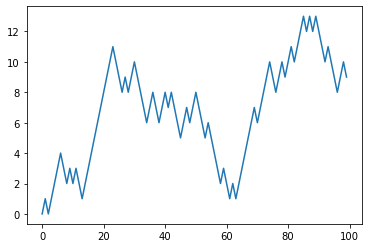

In [74]:
plt.plot(walk[:100])

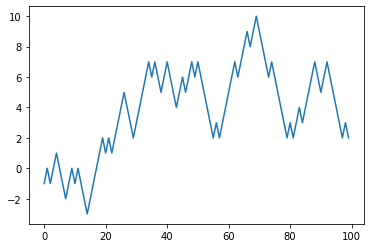

In [75]:
# С ипсользованием NumPy

nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk[:100])

In [76]:
walk.min()

-14

In [77]:
walk.max()

14

In [78]:
# Вычислим, на каком шаге мы впервые достигли отметки в 10
(np.abs(walk) >= 10).argmax()

69

## Моделирование сразу нескольких случайных блужданий

In [79]:
#  чтобы это сделать, нужно всего лишь сделать двумерный массив из предыдущего примера
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,   2,   3,   2],
       [  1,   2,   1, ...,  -8,  -9, -10],
       [ -1,  -2,  -3, ..., -12, -11, -12],
       ...,
       [ -1,   0,   1, ...,  10,  11,  10],
       [  1,   0,   1, ...,  -2,  -1,  -2],
       [  1,   0,   1, ...,  40,  39,  38]], dtype=int32)

In [80]:
# теперь мы  можем вычислить min и max по всем блужданиям
walks.max()

120

In [81]:
walks.min()

-109

In [82]:
# проверим, в скольки блужданиях достигалось значение 30
hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
print(hits30.sum())

[False  True False ... False False  True]
3342


In [83]:
# вычислим среднее значение номера первого достижения 30
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

491.4189108318372

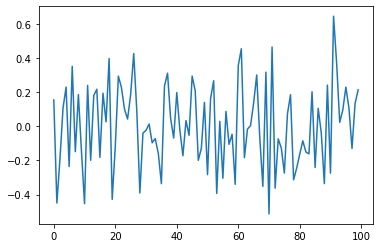

In [84]:
# теперь рассмотрим нормальное распределение
steps = np.random.normal(loc=0, scale=0.25, size=(nsteps))
plt.plot(steps[:100])

In [85]:
steps.max()

0.852929825508494

In [86]:
steps.min()

-0.8105240175270155